# Статистические критерии

In [1]:
import pandas as pd
from matplotlib import pyplot
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/independent_t_student.csv')
df.shape

(100, 2)

In [3]:
df.head()

,men,women
0,66,47
1,62,55
2,53,48
3,59,42
4,54,50


array([[<AxesSubplot: title={'center': 'men'}>,
        <AxesSubplot: title={'center': 'women'}>]], dtype=object)

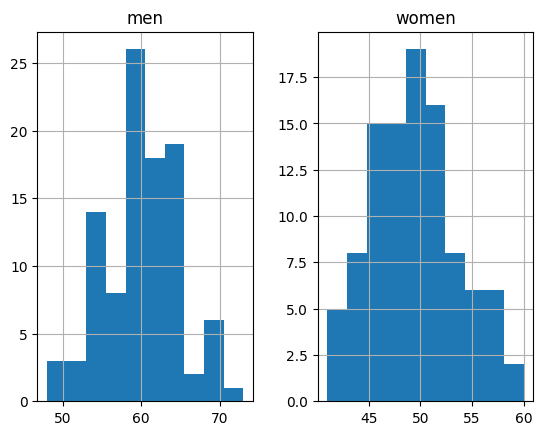

In [4]:
df.hist()

(array([ 5.,  8., 15., 15., 19., 16.,  8.,  6.,  6.,  2.]),
 array([41. , 42.9, 44.8, 46.7, 48.6, 50.5, 52.4, 54.3, 56.2, 58.1, 60. ]),
 <BarContainer object of 10 artists>)

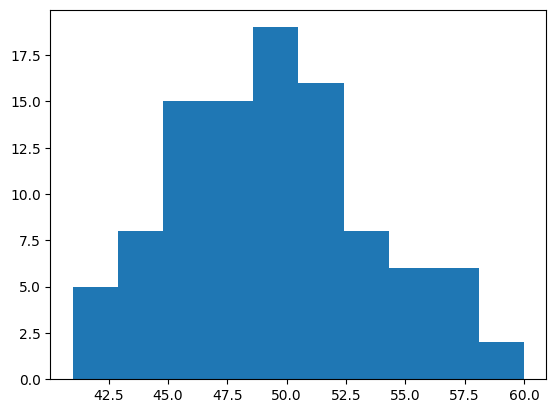

In [5]:
pyplot.hist(df.women)

(array([ 3.,  3., 14.,  8., 26., 18., 19.,  2.,  6.,  1.]),
 array([48. , 50.5, 53. , 55.5, 58. , 60.5, 63. , 65.5, 68. , 70.5, 73. ]),
 <BarContainer object of 10 artists>)

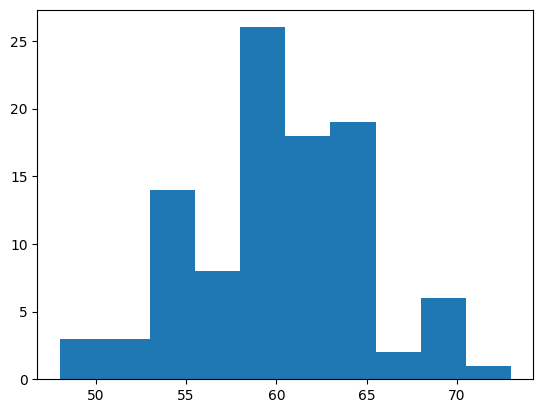

In [6]:
pyplot.hist(df.men)

In [7]:
from scipy import stats

In [8]:
stats.shapiro(df.women)

ShapiroResult(statistic=0.9810583591461182, pvalue=0.16059483587741852)

In [9]:
stats.shapiro(df.men)

ShapiroResult(statistic=0.9900975823402405, pvalue=0.6724860072135925)

## Тест Левена

Используется для проверки следующей гипотезы: <br>
`H0: Выборки имеют равные дисперсии`


In [10]:
stats.levene(df.men, df.women)

LeveneResult(statistic=0.2644266082613287, pvalue=0.6076686464894372)

In [11]:
stats.ttest_ind(df.men, df.women)

Ttest_indResult(statistic=16.422524648309142, pvalue=8.206721395990692e-39)

## Т-Критерий Уэлча

Модификация критерия Стюдента для выборок с неравными дисперсиями

In [12]:
stats.ttest_ind(df.men, df.women, equal_var=False)

Ttest_indResult(statistic=16.422524648309142, pvalue=9.940369712406374e-39)

In [13]:
stats.ttest_ind(df.men, df.women, equal_var=False, alternative='greater')

Ttest_indResult(statistic=16.422524648309142, pvalue=4.970184856203187e-39)

In [14]:
df2 = pd.read_csv('datasets/dependent_t.csv')
df2.head()

,id,pre,post
0,928,71.709023,76.969025
1,813,64.603133,75.304607
2,863,72.447850,82.358080
3,618,68.202316,72.145752
4,865,66.706736,79.344155


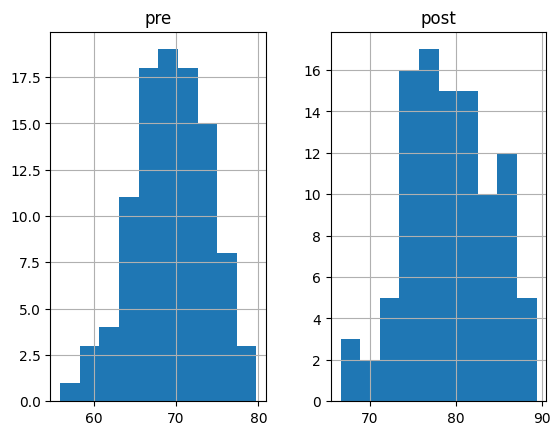

In [15]:
df2[['pre', 'post']].hist();

In [16]:
stats.shapiro(df2.pre)

ShapiroResult(statistic=0.9940342307090759, pvalue=0.9418994188308716)

In [17]:
stats.shapiro(df2.post)

ShapiroResult(statistic=0.985990047454834, pvalue=0.3733612596988678)

## Парный Т-критерий
Используется для проверки следующей гипотезы на зависимых выборках <br>
`H0: Средние в выборках равны`

In [18]:
stats.ttest_rel(df2.pre, df2.post, alternative='less')

TtestResult(statistic=-16.160279927323444, pvalue=8.089311044408884e-30, df=99)

In [19]:
df3 = pd.read_csv('datasets/mann_whitney.csv')
df3.head()

,feedback,age
0,5,28
1,5,28
2,4,26
3,4,18
4,2,15


In [20]:
df3.shape

(30, 2)

In [21]:
before18 = df3[df3.age <= 18].feedback
after18 = df3[df3.age > 18].feedback
print(len(before18), len(after18))

15 15


In [22]:
stats.shapiro(before18)

ShapiroResult(statistic=0.869794487953186, pvalue=0.033507298678159714)

In [23]:
stats.shapiro(after18)

ShapiroResult(statistic=0.7914904952049255, pvalue=0.0028649710584431887)

## Критерий Манна Уитни
Используется для проверки следующей гипотезы на выборках, которые не удовлетворяют условию о нормальном распределении: <br>
`H0: Распределение, лежащее в основе выборки x, совпадает с распределение, лежащим в основе выборки y`

In [24]:
stats.mannwhitneyu(before18, after18, alternative='greater')

MannwhitneyuResult(statistic=46.0, pvalue=0.9978023851377417)

In [25]:
stats.mannwhitneyu(before18, after18, alternative='less')

MannwhitneyuResult(statistic=46.0, pvalue=0.002509619590681187)

# Тест Вилкоксона

In [26]:
from scipy import stats

In [28]:
df4 = pd.read_csv('datasets/signed_wilcoxon.csv')
df4.head()

,before,after
0,6,6
1,5,6
2,12,1
3,12,11
4,3,11


In [29]:
df4.shape

(30, 2)

In [30]:
stats.shapiro(df4.before)

ShapiroResult(statistic=0.8824636936187744, pvalue=0.0032130188774317503)

In [31]:
stats.shapiro(df4.after)

ShapiroResult(statistic=0.9091560244560242, pvalue=0.014169566333293915)

## Знаковый ранговый тест Вилкоксона

Используется для проверки следующей гипотезы на зависимых выборках, которые не удовлетворяют условию нормального распределения: <br>
`H0: Выборки x и y происходят из одного распределения`

In [34]:
stats.wilcoxon(df4.before, df4.after, alternative='greater')

/usr/local/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=132.0, pvalue=0.7946318573868679)